# Photoionization / radiative recombination + dielectronic recombination

- formula:
  - photoionization: [Tasitsiomi 2006](https://doi.org/10.1086%2F504460) (cross-sections)
  - radiative recombination: [Verner 1995](https://doi.org/10.1086%2F192284)
  - dielectronic recombination: [Badnell 2006](https://doi.org/10.1086%2F508465)
- data:
  - radiative recombination: [Badnell 2006](https://doi.org/10.1086%2F508465)
  - dielectronic recombination: [Badnell 2006](https://doi.org/10.1086%2F508465)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import lss

from utils import *

In [59]:
element = lss.O1Inasan()
"""
13S3S - fast level
12P1D4 - 
"""
# element.keys = element.all_keys
element.keys = ["12P3P4", "22P4S"]
# element.keys = ["12P1D4", "22P4S"]
# element.keys = ["13S3S", "22P4S"]

population_nlte_1 = [0.0 for _ in range(len(element.keys))]
# population_nlte_1[0] = 1.0
population_nlte_1[0] = 0.0
population_nlte_1[1] = 1.0

count = int(1e3)
temperatures = np.full(count, 1.0e4)
electron_number_densities = np.linspace(1.0e1, 1.0e31, num=count)
optical_depth = 0.0

# delta_time = 0.01
delta_time = 1.0e-20

In [60]:
ri_balance = ["pi_tasitsiomi", "rr_badnell_verner", "dr_badnell"]

b_factors = calculate_b_factors(
    element=element,
    population_nlte_1=population_nlte_1,
    temperatures=temperatures,
    electron_number_densities=electron_number_densities,
    optical_depth=optical_depth,
    delta_time=delta_time,
    transitions_types=[
        *ri_balance,
    ]
)

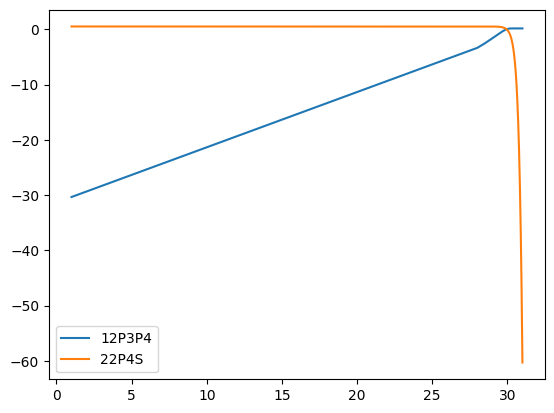

In [61]:
for i, key in enumerate(element.keys):
    plt.plot(
        np.log10(electron_number_densities),
        np.log10(b_factors.T[i]),
        label=key,
    )
plt.legend()
plt.show()